In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# project modules
import os
import sys
sys.path.insert(0, os.path.abspath('../../modules'))

from helper_functions import count_nan_features, convert_ber_rating_to_energy_rating

### Read the data

In [57]:
df1 = pd.read_csv("../../data/training/BERRatingData_aa.csv", sep=";", on_bad_lines="skip", encoding='latin', low_memory=False)
df2 = pd.read_csv("../../data/training/BERRatingData_bv.csv", sep=";", on_bad_lines="skip", encoding='latin', low_memory=False)
df3 = pd.read_csv("../../data/training/BERRatingData_cd.csv", sep=";", on_bad_lines="skip", encoding='latin', low_memory=False)
df4 = pd.read_csv("../../data/training/BERRatingData_cu.csv", sep=";", on_bad_lines="skip", encoding='latin', low_memory=False)

df = pd.concat([df1, df2, df3, df4], axis=0)
#df = df3
#df = pd.read_csv("../../data/training/BERRatingData_bv.csv", sep=";", on_bad_lines="skip", low_memory=False)
print(df.shape)

df.head()

(39953, 211)


,CountyName,DwellingTypeDescr,Year_of_Construction,TypeofRating,EnergyRating,BerRating,GroundFloorArea(sq m),UValueWall,UValueRoof,UValueFloor,...,ThirdWallAgeBandId,ThirdWallTypeId,SA_Code,prob_smarea_error_0corr,prob_smarea_error_100corr,RER,RenewEPnren,RenewEPren,CPC,EPC
0,Co. Dublin,Semi-detached house,2019,Final,A2,49.40,118.30,0.18,0.16,0.21,...,NaN,NaN,267105014/02,0.017443,0.017443,NaN,NaN,NaN,0.330,0.345
1,Co. Dublin,Semi-detached house,2019,Final,A2,49.93,118.30,0.18,0.16,0.21,...,NaN,NaN,267105014/02,0.017443,0.017443,NaN,NaN,NaN,0.333,0.348
2,Co. Galway,Detached house,1940,Existing,D2,288.33,116.18,0.86,0.86,0.65,...,3.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Co. Wicklow,Mid-terrace house,1977,Existing,D1,230.10,85.50,0.35,0.13,0.61,...,NaN,NaN,257051043,0.000222,0.012347,NaN,NaN,NaN,NaN,NaN
4,Co. Kerry,Detached house,1939,Existing,E2,349.73,123.07,0.38,1.57,0.76,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
# check data to see if it is balanced
df['EnergyRating'].value_counts()

EnergyRating
A2    8470
C1    3935
B3    3755
C2    3433
A3    3326
C3    2981
B2    2491
D1    2481
D2    2116
B1    1777
G     1475
E1    1159
F     1014
E2     908
A1     632
Name: count, dtype: int64

In [61]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 39953 entries, 0 to 9976
Data columns (total 211 columns):
 #    Column                               Non-Null Count  Dtype  
---   ------                               --------------  -----  
 0    CountyName                           39953 non-null  object 
 1    DwellingTypeDescr                    39953 non-null  object 
 2    Year_of_Construction                 39953 non-null  int64  
 3    TypeofRating                         39953 non-null  object 
 4    EnergyRating                         39953 non-null  object 
 5    BerRating                            39953 non-null  float64
 6    GroundFloorArea(sq m)                39953 non-null  float64
 7    UValueWall                           39953 non-null  float64
 8    UValueRoof                           39953 non-null  float64
 9    UValueFloor                          39953 non-null  float64
 10   UValueWindow                         39953 non-null  float64
 11   UvalueDoor         

In [ ]:
# scatter matrix

#from pandas.plotting import scatter_matrix
#options = ['Detached house'] 
   
# selecting rows based on condition 
#df_10 = df[df['DwellingTypeDescr'].isin(options)] 

#df_3_scatter_matrix = df_10.iloc[: , :20]
#df_3_scatter_matrix.shape
# Draw scatter matrix
#scatter_matrix(df_3_scatter_matrix, figsize=(30, 30))
#plt.show()

### Count Number of NaN's

In [ ]:
# count number of NaN's for all features
#for feature in df:
#  print(feature, df[feature].isna().sum())

In [36]:
# build up list of features containing a certain fraction of NaN's 
fraction_na_in_feature = 0.8 # 80%
count_nan_features(df, (1-fraction_na_in_feature))
count_of_nans = (pd.isnull(df).sum() > ((1-fraction_na_in_feature)*len(df))).to_dict()
features_to_drop = []
for feature in count_of_nans:
  if count_of_nans[feature] == True:
    #print(feature, df[feature].isna().sum())
    features_to_drop.append(feature)

print(features_to_drop)

No of features with more than 20.0% NaN's: 77
['StorageLosses', 'ManuLossFactorAvail', 'SolarHotWaterHeating', 'ElecImmersionInSummer', 'CombiBoiler', 'KeepHotFacility', 'WaterStorageVolume', 'DeclaredLossFactor', 'TempFactorUnadj', 'TempFactorMultiplier', 'InsulationType', 'InsulationThickness', 'PrimaryCircuitLoss', 'CombiBoilerAddLoss', 'ElecConsumpKeepHot', 'ApertureArea', 'ZeroLossCollectorEff', 'CollectorHeatLossCoEff', 'AnnualSolarRadiation', 'OvershadingFactor', 'SolarStorageVolume', 'VolumeOfPreHeatStore', 'ElectricityConsumption', 'gsdHSSupplHeatFraction', 'gsdHSSupplSystemEff', 'DistLossFactor', 'CHPUnitHeatFraction', 'CHPSystemType', 'CHPElecEff', 'CHPHeatEff', 'CHPFuelType', 'SupplHSFuelTypeID', 'gsdSHRenewableResources', 'gsdWHRenewableResources', 'SolarHeatFraction', 'TotalDeliveredEnergy', 'DeliveredEnergySecondarySpace', 'DeliveredEnergySupplementaryWater', 'CO2SecondarySpace', 'CO2SupplementaryWater', 'FirstEnerProdComment', 'FirstEnerConsumedComment', 'SecondEnerProd

### Drop NaN Features

In [4]:
#df = df.dropna(axis=1, thresh=int(0.7*len(df)))
#count_nan_features(df, 0.1)

No of features with more than 10.0% NaN's: 5


### Drop Features 

In [37]:
# drop columns which are swaying the results

df_1 = df.drop(features_to_drop + ['Year_of_Construction', 'CPC', 'EPC', 'RER', 'RenewEPnren', 'RenewEPren', 'SA_Code', 'PurposeOfRating', 'HESSchemeUpgrade', 'DateOfAssessment', 'CO2Rating', 'CO2MainSpace', 'MPCDERValue'], axis=1)
print("df_1.shape:", df_1.shape)

df_1.shape: (9995, 122)


In [38]:
# drop features with more than 20 category values
categorical_cols = df_1.select_dtypes(include='O').keys()
# unique values in each columns
cats_to_drop = []
for x in df_1.columns:
  if x in categorical_cols:
    if len(df_1[x].unique()) > 20:
      cats_to_drop.append(x) 
    #print(x ,':', len(df[x].unique()))

# drop features
df_2 = df_1.drop(cats_to_drop, axis=1)
#df_2 = df_1      
print("df_2.shape:", df_2.shape)

categorical_cols = df_2.select_dtypes(include='O').keys()
categorical_cols = categorical_cols.drop(['EnergyRating'])

##print(categorical_cols)

df_3 = pd.get_dummies(df_2, columns = categorical_cols)

# replace spaces in features names
df_3.columns = df_3.columns.str.replace(" ", "_").str.replace("[^\w]", "", regex=True)

print("df_3.shape:", df_3.shape)
df_3.head()


df_2.shape: (9995, 121)
df_3.shape: (9995, 193)


,EnergyRating,BerRating,GroundFloorAreasq_m,UValueWall,UValueRoof,UValueFloor,UValueWindow,UvalueDoor,WallArea,RoofArea,...,FirstEnergyType_Description_Renewable_Electrical,FirstEnergyType_Description_Renewable_Thermal,SecondEnergyType_Description_Not_Renewable,SecondEnergyType_Description_Renewable_Electrical,SecondEnergyType_Description_Renewable_Thermal,ThirdEnergyType_Description_Not_Renewable,ThirdEnergyType_Description_Renewable_Electrical,ThirdEnergyType_Description_Renewable_Thermal,FirstWallIsSemiExposed_No,FirstWallIsSemiExposed_Yes
0,C3,202.74,136.40,0.60,0.65,0.57,2.81,3.00,113.05,74.11,...,False,True,False,False,True,False,False,True,True,False
1,C3,219.49,86.72,0.53,0.40,0.41,2.80,2.00,119.16,43.36,...,False,True,False,False,True,False,False,True,True,False
2,F,399.37,46.14,0.55,0.20,0.44,2.80,3.03,43.77,46.14,...,False,True,False,False,True,False,False,True,True,False
3,C2,188.80,90.83,0.55,0.26,0.44,2.75,3.00,79.00,90.83,...,False,True,False,False,True,False,False,True,True,False
4,C2,193.40,69.19,0.55,0.00,0.19,3.10,0.00,14.42,0.00,...,False,True,False,False,True,False,False,True,True,False


### Baseline model: Train/test split

In [39]:
from sklearn.model_selection import train_test_split

X = df_3.drop(['BerRating', 'EnergyRating'], axis='columns')

y_ber_rating = df_3.BerRating # 1st dependent variable (for regression)
y_energy_rating = df_3.EnergyRating # 2nd dependent variable (for confusion matrix)

X_train, X_test, y_train, y_test, y_energy_rating_train, y_energy_rating_test = train_test_split( X, y_ber_rating, y_energy_rating, test_size=0.3, shuffle=True,random_state=2) # tried to include 'stratify=y' but it's giving an error


In [9]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape, y_energy_rating_train.shape, y_energy_rating_test.shape)

(6996, 191) (2999, 191) (6996,) (2999,) (6996,) (2999,)


### Baseline model: LightGBM, reduced features, hot-one encoded

In [40]:
# Build LightGBM
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, mean_absolute_percentage_error, confusion_matrix

model_lgbm = lgb.LGBMRegressor(learning_rate=0.15,max_depth=-5,random_state=42)
model_lgbm.fit(X_train,y_train,eval_set=[(X_test,y_test),(X_train,y_train)],
          eval_metric='logloss')
y_preds = model_lgbm.predict(X_test)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.024101 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9901
[LightGBM] [Info] Number of data points in the train set: 6996, number of used features: 160
[LightGBM] [Info] Start training from score 164.745635


In [41]:
# regression metrics
score=model_lgbm.score(X_test,y_test)
print("R2: {:.3f}%".format(score*100) )
print("Mean absolute error: " f"{mean_absolute_error(y_test, y_preds):.3f} kWh/m2/year")
print("Median absolute error: " f"{median_absolute_error(y_test, y_preds):.3f} kWh/m2/year")
print("Mean absolute percentage error: " f"{mean_absolute_percentage_error(y_test, y_preds) * 100:.3f} %")

print('Training accuracy {:.4f}'.format(model_lgbm.score(X_train,y_train)))
print('Testing accuracy {:.4f}'.format(model_lgbm.score(X_test,y_test)))

y_preds_energy_rating_labels = convert_ber_rating_to_energy_rating(y_preds)
cm = confusion_matrix(y_energy_rating_test, y_preds_energy_rating_labels)

print("CM\n", cm)

R2: 97.624%
Mean absolute error: 11.234 kWh/m2/year
Median absolute error: 5.853 kWh/m2/year
Mean absolute percentage error: 8.915 %
Training accuracy 0.9967
Testing accuracy 0.9762
CM
 [[ 64  25   2   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  8 683  24   0   0   1   0   0   0   0   0   0   0   0   0   0   0]
 [  0  24 115  15   0   1   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0  12 103  29   1   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0  27 105  47   2   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0  38 205  64   0   0   2   0   0   0   0   0   0   0]
 [  0   0   0   0   1  31 197  65   5   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  56 143  50   2   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   3  44 111  33   1   0   0   0   0   0   0]
 [  0   0   0   0   0   0   1   2  45 106  28   3   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   2  24  83  27   2   0   0   0   0]
 [  0   0   0   0   0   0   0   0

In [ ]:
lgb.plot_importance(model_lgbm, figsize=(30, 30))
lgb.plot_metric(model_lgbm)

In [13]:
# list feature importance

# compute importances
#importance_df = (
#    pd.DataFrame({
#        'feature_name': model_lgbm.feature_name_,
#        'importance_gain': model_lgbm.feature_importance(importance_type='gain'),
#        'importance_split': model_lgbm.feature_importance(importance_type='split'),
#    })
#    .sort_values('importance_gain', ascending=False)
#    .reset_index(drop=True)
#)
print(model_lgbm.feature_name_)

['GroundFloorAreasq_m', 'UValueWall', 'UValueRoof', 'UValueFloor', 'UValueWindow', 'UvalueDoor', 'WallArea', 'RoofArea', 'FloorArea', 'WindowArea', 'DoorArea', 'NoStoreys', 'HSMainSystemEfficiency', 'TGDLEdition', 'HSEffAdjFactor', 'HSSupplHeatFraction', 'HSSupplSystemEff', 'WHMainSystemEff', 'WHEffAdjFactor', 'SupplSHFuel', 'SupplWHFuel', 'SHRenewableResources', 'WHRenewableResources', 'NoOfChimneys', 'NoOfOpenFlues', 'NoOfFansAndVents', 'NoOfFluelessGasFires', 'FanPowerManuDeclaredValue', 'HeatExchangerEff', 'PercentageDraughtStripped', 'NoOfSidesSheltered', 'PermeabilityTestResult', 'TempAdjustment', 'HeatSystemControlCat', 'HeatSystemResponseCat', 'NoCentralHeatingPumps', 'NoOilBoilerHeatingPumps', 'NoGasBoilerHeatingPumps', 'GroundFloorUValue', 'DistributionLosses', 'DeliveredLightingEnergy', 'DeliveredEnergyPumpsFans', 'DeliveredEnergyMainWater', 'DeliveredEnergyMainSpace', 'PrimaryEnergyLighting', 'PrimaryEnergyPumpsFans', 'PrimaryEnergyMainWater', 'PrimaryEnergyMainSpace', 'CO2

In [ ]:
lgb.plot_tree(model_lgbm,figsize=(30,40))

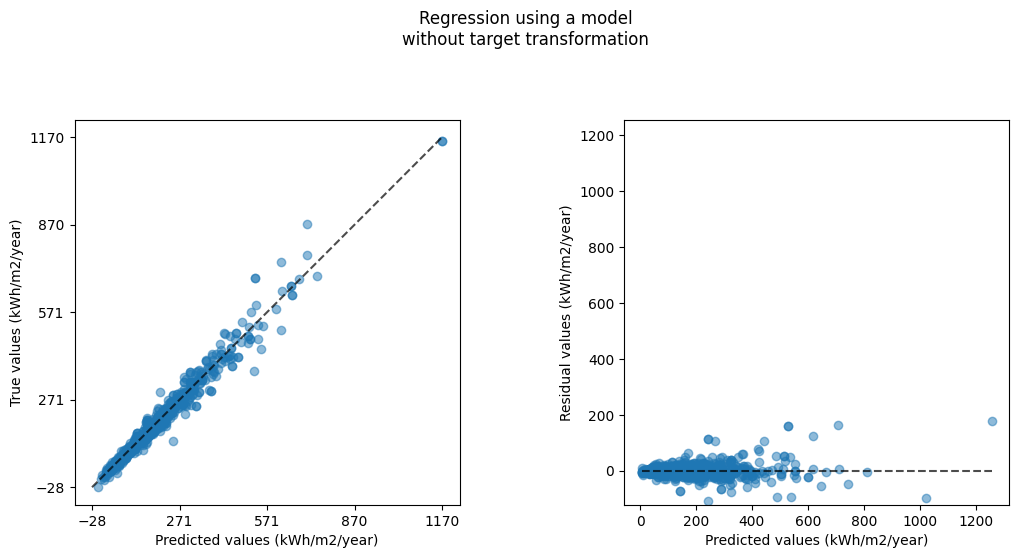

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import PredictionErrorDisplay

fig, axs = plt.subplots(ncols=2, figsize=(13, 5))

PredictionErrorDisplay.from_predictions(
    y_true=y_test,
    y_pred=y_preds,
    kind="actual_vs_predicted",
    scatter_kwargs={"alpha": 0.5},
    ax=axs[0],
)
axs[0].axis("square")
axs[0].set_xlabel("Predicted values (kWh/m2/year)")
axs[0].set_ylabel("True values (kWh/m2/year)")

PredictionErrorDisplay.from_predictions(
    y_true=y_test,
    y_pred=y_preds,
    kind="residual_vs_predicted",
    scatter_kwargs={"alpha": 0.5},
    ax=axs[1],
)
axs[1].axis("square")
axs[1].set_xlabel("Predicted values (kWh/m2/year)")
axs[1].set_ylabel("Residual values (kWh/m2/year)")

_ = fig.suptitle(
    "Regression using a model\nwithout target transformation", y=1.1
)

### Feature selection techniques 
#### Take out dependent variables

In [13]:
df_3_2 = df_3.drop(['BerRating', 'EnergyRating'], axis='columns')

y_ber_rating_2 = df_3.BerRating # 1st dependent variable (for regression)
y_energy_rating_2 = df_3.EnergyRating # 2nd dependent variable (for confusion matrix)


#### Variance threshold

In [42]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# train
df_4 = pd.DataFrame(scaler.fit_transform(df_3_2),columns = df_3_2.columns)

# drop all-NaN features 
df_5= df_4.dropna(axis=1, how='all')
df_5.shape

(9995, 191)

In [43]:
from sklearn.feature_selection import VarianceThreshold

var = VarianceThreshold(threshold=0.01)
var = var.fit(df_5)

cols = var.get_support()
cols

array([False,  True,  True,  True,  True,  True, False, False,  True,
       False, False,  True,  True,  True, False,  True,  True,  True,
       False, False,  True, False, False, False, False,  True, False,
       False,  True,  True,  True, False,  True,  True,  True, False,
        True,  True, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False,  True, False, False,  True, False, False,  True,
       False,  True, False,  True,  True, False,  True,  True, False,
       False, False, False, False, False,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True,  True,  True, False,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False,  True,  True, False,  True, False, False, False,  True,
       False, False, False, False, False,  True,  True, False,  True,
       False, False,

In [44]:
# low variance features/columns
lowVarianceFeatures = [column for column in df_5.columns if column not in df_5.columns[cols]]

for feature in lowVarianceFeatures:
  print(feature)

GroundFloorAreasq_m
WallArea
RoofArea
WindowArea
DoorArea
HSEffAdjFactor
WHEffAdjFactor
SupplSHFuel
SHRenewableResources
WHRenewableResources
NoOfChimneys
NoOfOpenFlues
NoOfFluelessGasFires
FanPowerManuDeclaredValue
PermeabilityTestResult
NoCentralHeatingPumps
GroundFloorUValue
DistributionLosses
DeliveredLightingEnergy
DeliveredEnergyPumpsFans
DeliveredEnergyMainSpace
PrimaryEnergyLighting
PrimaryEnergyPumpsFans
PrimaryEnergyMainWater
PrimaryEnergyMainSpace
CO2Lighting
CO2PumpsFans
CO2MainWater
GroundFloorArea
GroundFloorHeight
FirstFloorArea
SecondFloorArea
ThirdFloorArea
ThirdFloorHeight
PredominantRoofTypeArea
LowEnergyLightingPercent
PrimaryEnergySecondarySpace
RoomInRoofArea
FirstPartLTotalContribution
FirstEnerConsumedDelivered
FirstEnerConsumedConvFactor
FirstEnerConsumedCO2EmissionFactor
SecondEnergyTypeId
SecondEnerProdDelivered
SecondPartLTotalContribution
SecondEnerConsumedDelivered
SecondEnerConsumedConvFactor
SecondEnerConsumedCO2EmissionFactor
ThirdEnergyTypeId
ThirdEner

In [45]:
# drop low variance features
df_6 = df_5.drop(lowVarianceFeatures, axis=1)
df_6.head()

,UValueWall,UValueRoof,UValueFloor,UValueWindow,UvalueDoor,FloorArea,NoStoreys,HSMainSystemEfficiency,TGDLEdition,HSSupplHeatFraction,...,ThermalMassCategory_Mediumlow__________,PredominantRoofType_Flat_Roof_____________________,PredominantRoofType_Pitch_RoofInsulon_Ceiling___,PredominantRoofType_Pitch_RoofInsulon_Rafter____,PredominantRoofType_Room_in_RoofInsulon_side____,FirstEnergyType_Description_Renewable_Electrical,FirstEnergyType_Description_Renewable_Thermal,SecondEnergyType_Description_Renewable_Electrical,SecondEnergyType_Description_Renewable_Thermal,ThirdEnergyType_Description_Renewable_Thermal
0,0.213974,0.277778,0.463415,0.433333,0.508475,0.138868,0.25,0.060464,0.0,0.25,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
1,0.183406,0.170940,0.333333,0.431373,0.338983,0.081259,0.25,0.067635,0.0,0.25,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
2,0.192140,0.085470,0.357724,0.431373,0.513559,0.086469,0.00,0.035153,0.0,0.25,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
3,0.192140,0.111111,0.357724,0.421569,0.508475,0.170221,0.00,0.088586,0.0,0.25,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
4,0.192140,0.000000,0.154472,0.490196,0.000000,0.129666,0.00,0.069041,0.0,0.25,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0


In [46]:
# 
X_train_2, X_test_2, y_train_2, y_test_2, y_energy_rating_train_2, y_energy_rating_test_2 = train_test_split( df_6, y_ber_rating_2, y_energy_rating_2, test_size=0.3, shuffle=True,random_state=2) # tried to include 'stratify=y' but it's giving an error
X_train_2.shape

(6996, 96)

In [47]:
print(X_train_2.shape)
print(X_test_2.shape)
print(y_train_2.shape)
print(y_test_2.shape)
print(y_energy_rating_train_2.shape)
print(y_energy_rating_test_2.shape)
count_nan_features(df_6, 0.2)

(6996, 96)
(2999, 96)
(6996,)
(2999,)
(6996,)
(2999,)
No of features with more than 20.0% NaN's: 0


In [48]:
# Build LightGBM
model_lgbm_2 = lgb.LGBMRegressor(learning_rate=0.15,max_depth=-5,random_state=42)
model_lgbm_2.fit(X_train_2,y_train_2,eval_set=[(X_test_2,y_test_2),(X_train_2,y_train_2)], eval_metric='logloss')
y_preds_2 = model_lgbm_2.predict(X_test_2)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005515 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3666
[LightGBM] [Info] Number of data points in the train set: 6996, number of used features: 96
[LightGBM] [Info] Start training from score 164.745635


R2: 96.683%
Mean absolute error: 14.050 kWh/m2/year
Median absolute error: 7.537 kWh/m2/year
Mean absolute percentage error: 11.798 %
Training accuracy 0.9924
Testing accuracy 0.9668


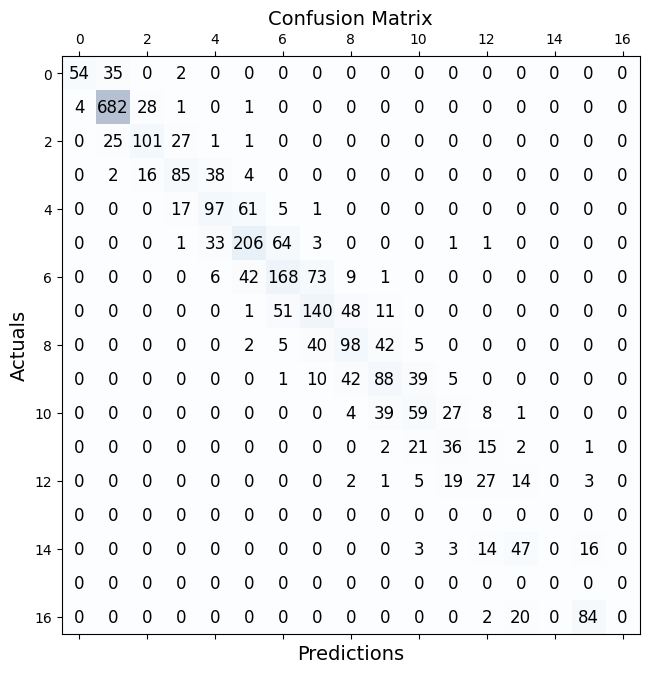

In [53]:
# metrics
score=model_lgbm_2.score(X_test_2,y_test_2)
print("R2: {:.3f}%".format(score*100) )
print("Mean absolute error: " f"{mean_absolute_error(y_test_2, y_preds_2):.3f} kWh/m2/year")
print("Median absolute error: " f"{median_absolute_error(y_test_2, y_preds_2):.3f} kWh/m2/year")
print("Mean absolute percentage error: " f"{mean_absolute_percentage_error(y_test_2, y_preds_2) * 100:.3f} %")

print('Training accuracy {:.4f}'.format(model_lgbm_2.score(X_train_2,y_train_2)))
print('Testing accuracy {:.4f}'.format(model_lgbm_2.score(X_test_2,y_test_2)))

y_preds_energy_rating_labels_2 = convert_ber_rating_to_energy_rating(y_preds_2)
cm_2 = confusion_matrix(y_energy_rating_test_2, y_preds_energy_rating_labels_2)

#
# Print the confusion matrix using Matplotlib
#
from PIL import Image
import io

fig, ax = plt.subplots(figsize=(7.5, 7.5))

# We need to draw the canvas, otherwise the labels won't be positioned and won't have values yet
fig.canvas.draw()

labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1] = 'Testing'
ax.set_xticklabels(labels)

ax.matshow(cm_2, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm_2.shape[0]):
    for j in range(cm_2.shape[1]):
        ax.text(x=j, y=i,s=cm_2[i, j], va='center', ha='center', size='large')
 
plt.xlabel('Predictions', fontsize=14)
plt.ylabel('Actuals', fontsize=14)
plt.title('Confusion Matrix', fontsize=14)
plt.show()

# Save the image in memory in PNG format
png1 = io.BytesIO()
fig.savefig(png1, format="png")

# Load this image into PIL
png2 = Image.open(png1)

# Save as TIFF
png2.save("lightGBM_cm.tiff")
png1.close()

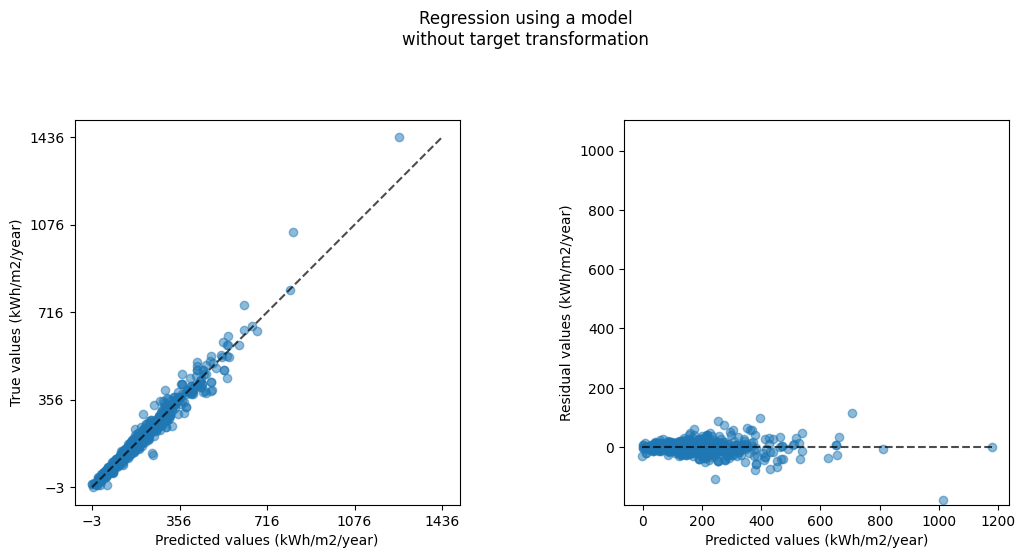

In [22]:
# plot 
fig, axs = plt.subplots(ncols=2, figsize=(13, 5))

PredictionErrorDisplay.from_predictions(
    y_true=y_test,
    y_pred=y_preds,
    kind="actual_vs_predicted",
    scatter_kwargs={"alpha": 0.5},
    ax=axs[0],
)
axs[0].axis("square")
axs[0].set_xlabel("Predicted values (kWh/m2/year)")
axs[0].set_ylabel("True values (kWh/m2/year)")

PredictionErrorDisplay.from_predictions(
    y_true=y_test,
    y_pred=y_preds,
    kind="residual_vs_predicted",
    scatter_kwargs={"alpha": 0.5},
    ax=axs[1],
)
axs[1].axis("square")
axs[1].set_xlabel("Predicted values (kWh/m2/year)")
axs[1].set_ylabel("Residual values (kWh/m2/year)")

_ = fig.suptitle(
    "Regression using a model\nwithout target transformation", y=1.1
)

In [ ]:
# learning rate
learning_rates = [x * 0.05 for x in range(1, 20)]
results = {}

print("Learning Rate R2         MAE         MAE         MAPE")
for eta in learning_rates:
   model_lgbm_3 = lgb.LGBMRegressor(learning_rate=eta,max_depth=-5,random_state=42)
   model_lgbm_3.fit(X_train_2, y_train_2)
   y_preds = model_lgbm_3.predict(X_test_2)
   
   score = model_lgbm_3.score(X_test_2,y_test_2)
   r2 = score*100
   mae = mean_absolute_error(y_test, y_preds)
   medianae = median_absolute_error(y_test, y_preds)
   mape = mean_absolute_percentage_error(y_test, y_preds) * 100
   results[eta] = [r2, mae, medianae, mape]

   #print(round(eta,2), '\t', r2, mae, medianae, mape)

print(results)


In [26]:
# Print the names of the columns.
print("{:<10} {:<10} {:<10} {:<10} {:<10}".format('L Rate', 'r2', 'MAE', 'MedianAE', 'MAPE'))
 
# print each data item.
for eta, value in results.items():
    r2, mae, medianae, mape = value
    print("{:<10} {:<10} {:<10} {:<10} {:<10}".format(round(eta,2), round(r2, 5), round(mae, 5), round(medianae, 5), round(mape, 5)))

L Rate     r2         MAE        MedianAE   MAPE      
0.05       94.82697   18.91151   11.1869    21.43495  
0.1        95.44638   17.49786   10.05176   17.07785  
0.15       95.54237   17.04302   9.64308    12.68035  
0.2        95.32521   17.27814   9.65129    17.04131  
0.25       95.33471   17.25477   9.5968     18.17893  
0.3        95.22063   17.51918   9.68214    21.2271   
0.35       94.85022   17.98874   9.74584    23.77814  
0.4        94.68612   18.23682   9.76742    22.68077  
0.45       94.38072   18.70326   9.9946     16.57933  
0.5        94.4775    18.66292   9.94352    31.02356  
0.55       94.21852   19.14339   10.39768   19.64189  
0.6        93.90715   19.32973   10.34958   32.4826   
0.65       93.6766    20.11981   10.64551   41.56614  
0.7        93.42042   20.16538   10.6622    26.57431  
0.75       92.53401   21.21584   11.17875   35.26491  
0.8        92.82813   21.0612    10.80983   15.40101  
0.85       92.56814   21.64852   11.14368   40.73232  
0.9       

### Grid Search

In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, max_error, explained_variance_score, mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV

# Step 1: Define parameter grid for hyperparameter tuning
param_grid = {
    'learning_rate': [0.05, 0.1, 0.15, 0.2],
    'n_estimators': [50, 100],
    'max_depth': [4, 6, 8],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'subsample': [0.7, 0.8, 0.9],
    'min_child_samples': [1, 5, 10]
}

# Step 2: Initialize LGBMRegressor estimattor
estimator = lgb.LGBMRegressor(objective='regression', 
                              random_state=101)

# Step 3: Initalise Grid Search with 3-fold cross validation and fit model
best_model = GridSearchCV(estimator=estimator, 
                     param_grid=param_grid,
                     cv=3, 
                     n_jobs=-1, 
                     scoring='neg_root_mean_squared_error')
best_model.fit(X_train_2, y_train_2)

# Step 4: Print best parameters
best_params = best_model.best_estimator_
print(best_params)


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010256 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3666
[LightGBM] [Info] Number of data points in the train set: 6996, number of used features: 96
[LightGBM] [Info] Start training from score 164.745635
LGBMRegressor(colsample_bytree=0.7, max_depth=8, min_child_samples=5,
              objective='regression', random_state=101, subsample=0.7)


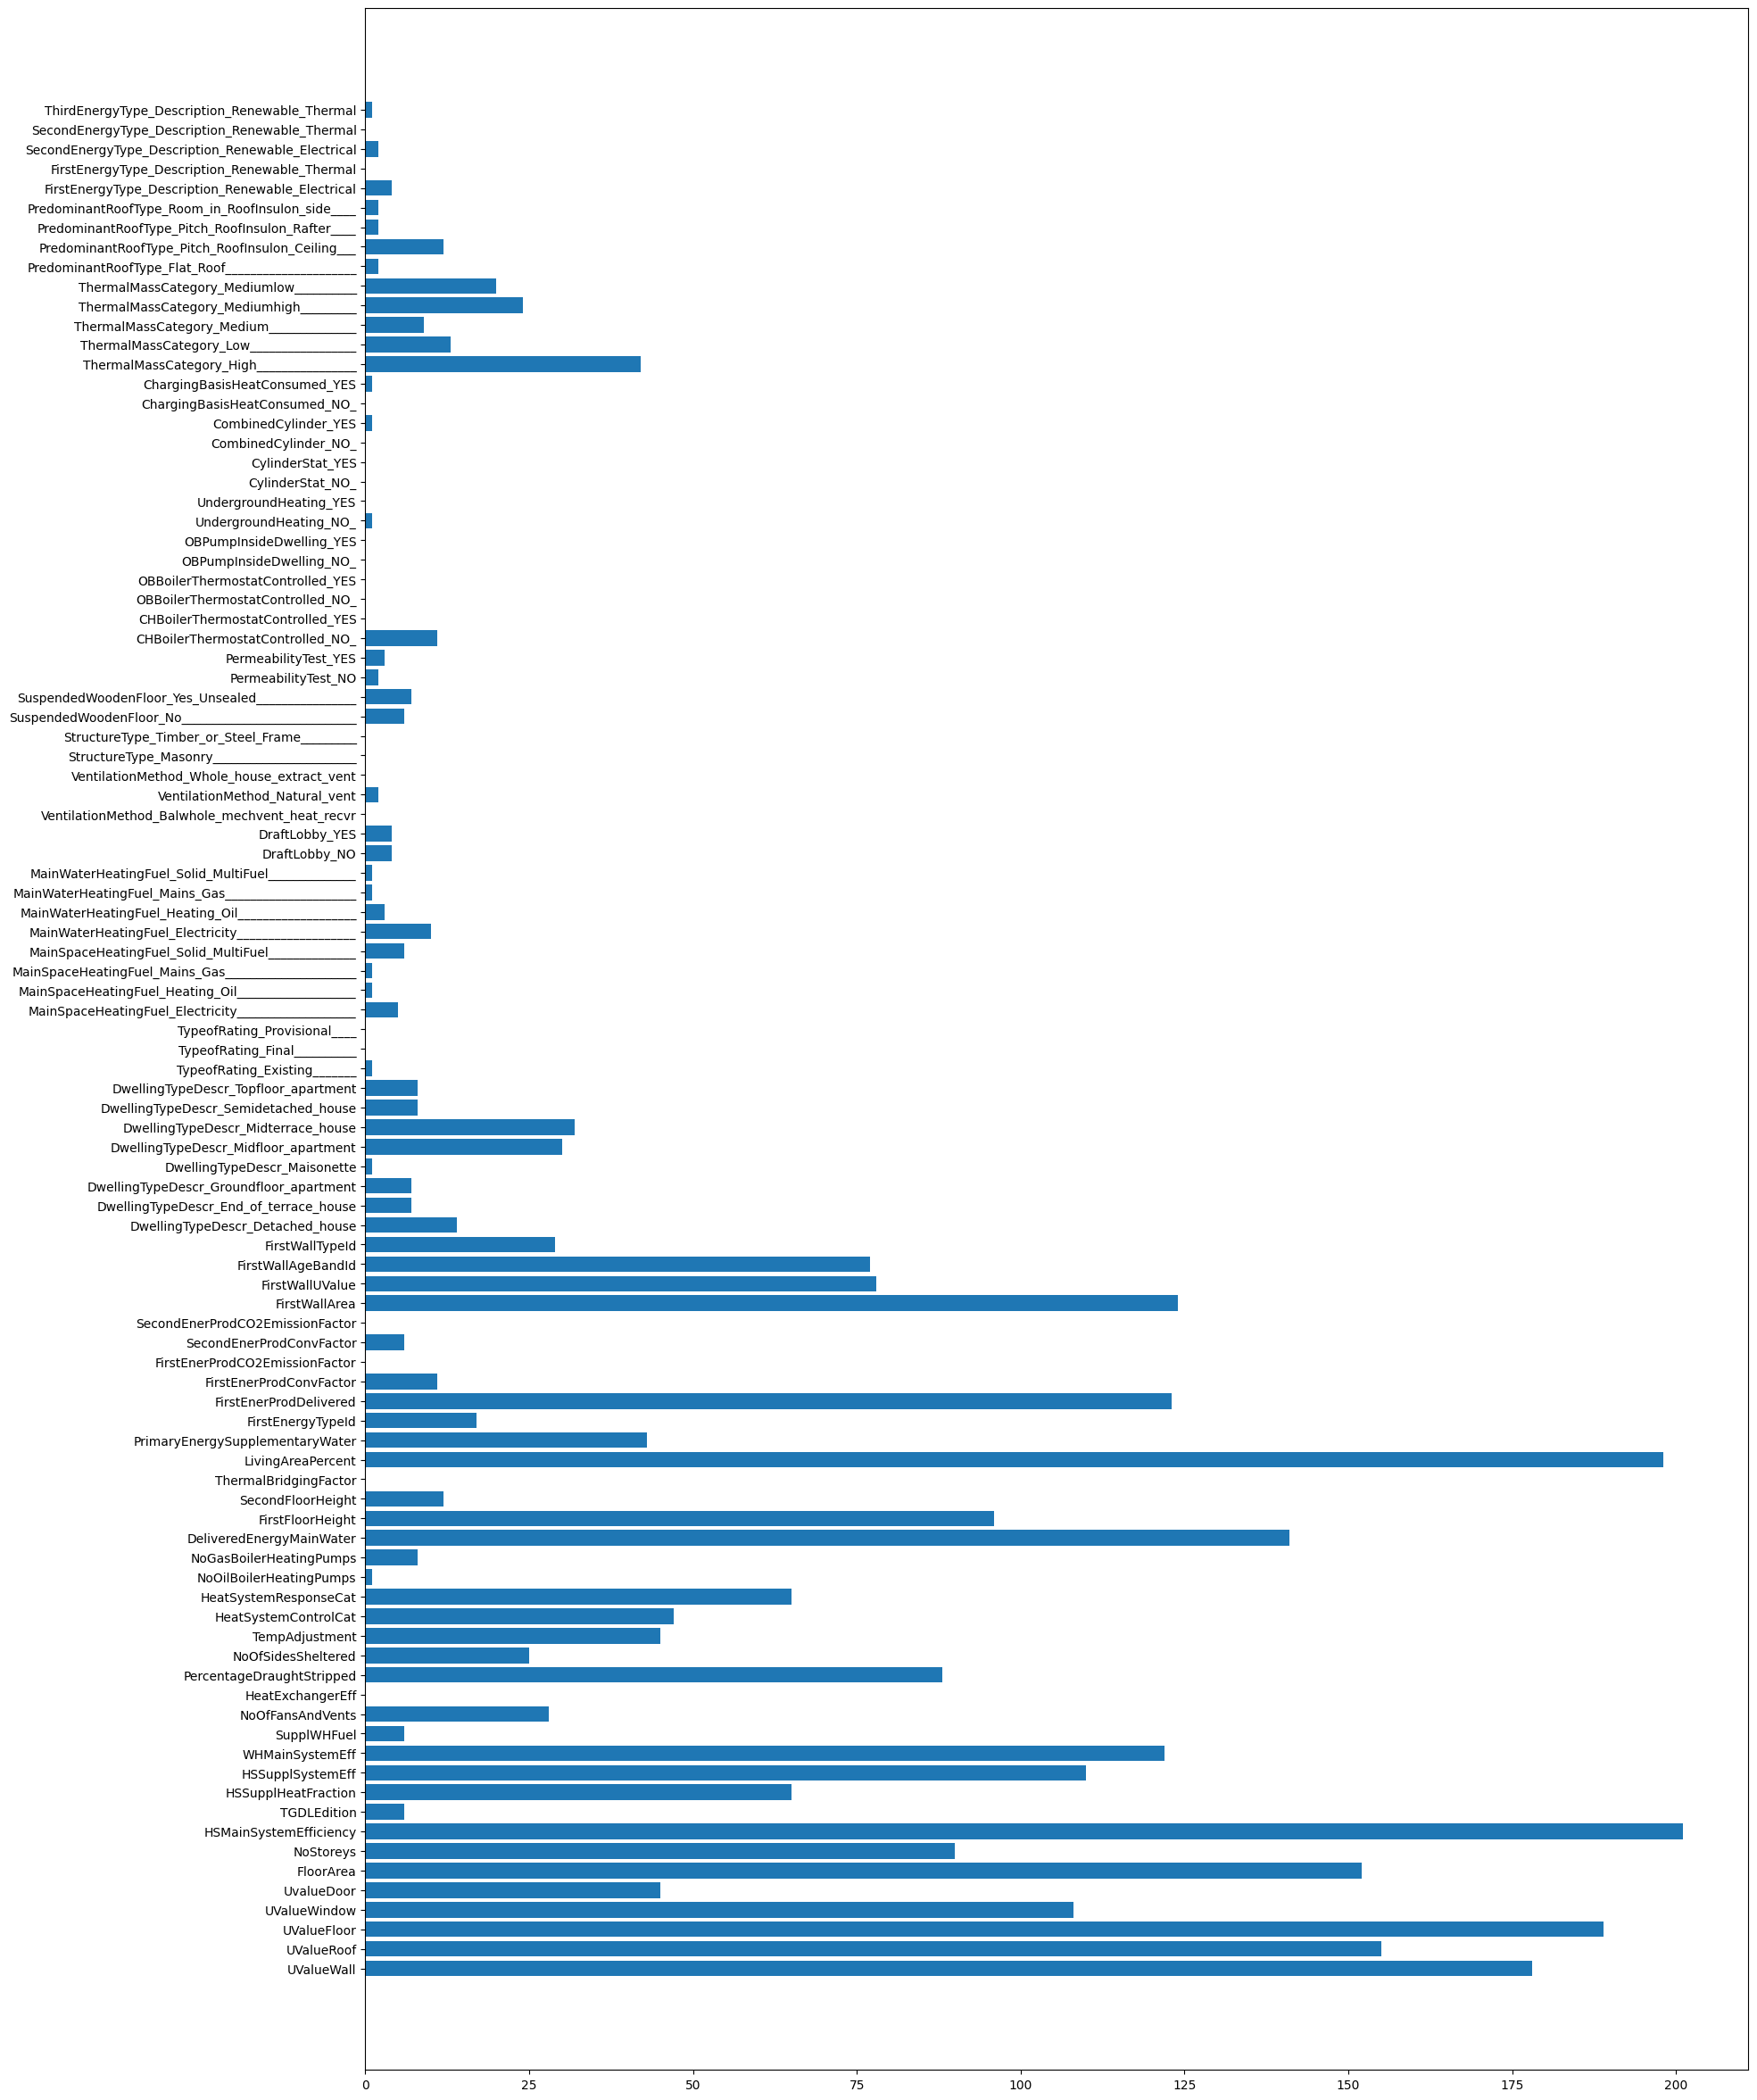

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
RMSE: 24.86586713772727
MAE: 14.675518778221234
Max Error: 236.73691027909683
Explained Variance Score: 0.9655519597571053
{'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 8, 'min_child_samples': 5, 'n_estimators': 100, 'subsample': 0.7}


In [34]:
# Step 5: Plot feature importances
features = X_train_2.columns
importance_values = best_model.best_estimator_.feature_importances_

plt.figure(figsize=(20,30))
plt.barh(y=range(len(features)),
         width=importance_values,
         tick_label=features)
plt.show()

# Step 6: Make prediction for test data & evaluate performance
y_pred_2 = best_model.predict(X_test_2)
print('RMSE:',mean_squared_error(y_test_2, y_pred_2, squared=False))
print('MAE:',mean_absolute_error(y_test_2, y_pred_2))
print('Max Error:',max_error(y_test_2, y_pred_2))
print('Explained Variance Score:',explained_variance_score(y_test_2, y_pred_2))
print(best_model.best_params_)